# Respondent-driven sampling data

In this notebook, we want to generate RDS. We will compare different graph
structures and different RDS generators.

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import sys  
sys.path.insert(0, '../scripts/')

from artificial_data import GenerateData

## Model 1 

- Erdos-Renyi Random Graph
- Sample starts with `n_seeds` seeds and stops when the sample is at least 30.
  Each recruited with probability `probs` decide to recruits 0, 1, 2, or 3
  respectively. 
  

In [2]:
gen_graph = GenerateData()
graph = gen_graph.random_graph(rule = 'erdos-renyi', parameters={'n': 100, 'p': 0.5, 'seed': 10000})
rds_sample = gen_graph.RDS_generator(graph = graph, seed = 20000, 
                                     n_seeds = 3, sample_size = 30, probs = [1/3,1/6,1/6,1/3])
                                     
rds_sample.number_of_nodes()

43

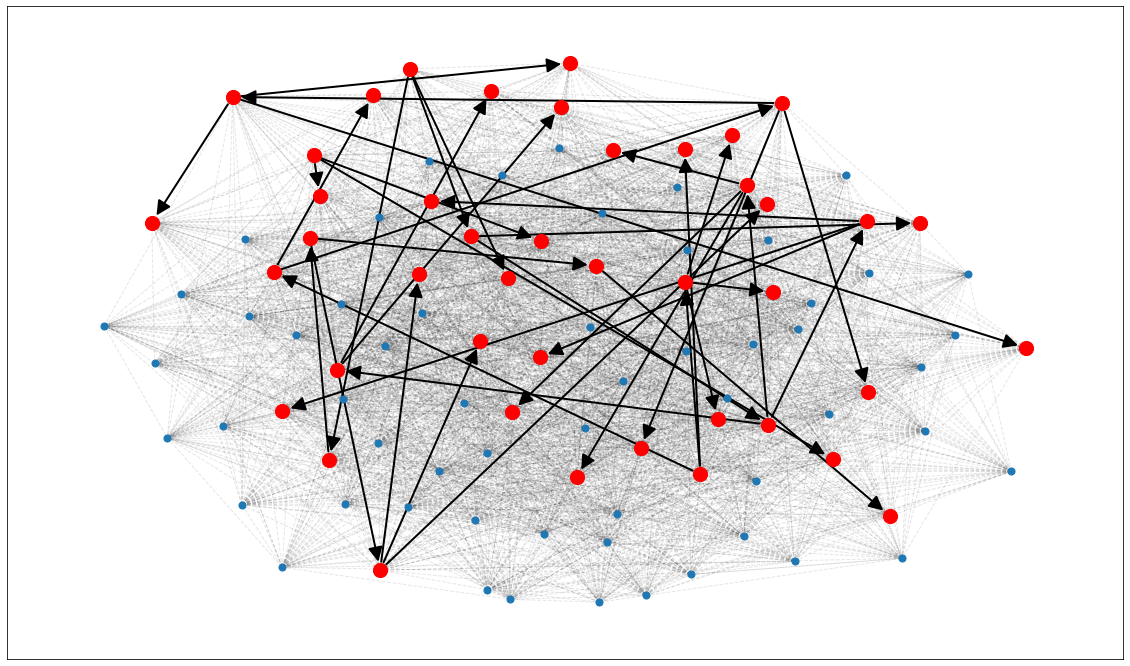

In [3]:
fig, ax = plt.subplots(figsize=(20,12))

pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos=pos, node_size = 50, ax = ax)#, node_color = colors, ax = ax)
nx.draw_networkx_edges(graph, pos=pos, edge_color='black', style='dashed',alpha =0.1, ax = ax)

nx.draw_networkx_nodes(rds_sample, pos=pos, node_size = 200, ax = ax, node_color = 'red')
nx.draw_networkx_edges(rds_sample, pos=pos, edge_color='black',alpha =1, width = 2, 
                       arrows = True, arrowsize = 30, ax = ax)
plt.show()